<a href="https://colab.research.google.com/github/luizmiguel016/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Lisboa

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Lisbon, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
# Nota: Este link aponta para a página web do GitHub, o que pode causar erros de parsing.
# Para evitar erros, o ideal seria usar o link para os dados brutos.
df = pd.read_csv("https://raw.githubusercontent.com/luizmiguel016/data_science/refs/heads/main/Analisando_Dados_Airbnb_Lisboa/listings.csv")

# mostrar as 5 primeiras entradas para verificar se o carregamento foi bem sucedido
display(df.head())

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,73.0,3,82,2025-03-01,0.64,1,284,18,NaN
1,25659,Heart of Alfama - Le cœur d'Alfama (3 people),107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,106.0,2,215,2024-11-11,1.62,1,298,13,56539/AL.
2,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,75.0,3,416,2025-02-27,2.67,1,206,30,28737/AL
3,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1065.0,2,142,2025-02-02,0.82,1,247,22,55695/AL
4,29915,Modern and Spacious Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74571,-9.15264,Entire home/apt,95.0,6,61,2024-05-20,0.34,1,169,1,85851/AL.


## Análise dos Dados
Este passo tem por objetivo introduzir uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `id` - número gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - nome do anfitrião
* `neighbourhood_group` - divisão administrativa de freguesias
* `neighbourhood` - nome da freguesia (bairro)
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - mostra o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.69750,-9.19768,Entire home/apt,73.0,3,82,2025-03-01,0.64,1,284,18,NaN
1,25659,Heart of Alfama - Le cœur d'Alfama (3 people),107347,Ellie,Lisboa,Santa Maria Maior,38.71241,-9.12706,Entire home/apt,106.0,2,215,2024-11-11,1.62,1,298,13,56539/AL.
2,29396,Alfama Hill - Boutique apartment,126415,Mónica,Lisboa,Santa Maria Maior,38.71156,-9.12987,Entire home/apt,75.0,3,416,2025-02-27,2.67,1,206,30,28737/AL
3,29720,TheHOUSE - Your luxury home,128075,Francisco,Lisboa,Estrela,38.71108,-9.15979,Entire home/apt,1065.0,2,142,2025-02-02,0.82,1,247,22,55695/AL
4,29915,Modern and Spacious Apartment in Lisboa,128890,Sara,Lisboa,Avenidas Novas,38.74571,-9.15264,Entire home/apt,95.0,6,61,2024-05-20,0.34,1,169,1,85851/AL.


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos seguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 24264 entradas e 79 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar os tipos das variáveis
display(df.dtypes)

Entradas:	 24264
Variáveis:	 18



,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade do *dataset* está intrinsecamente relacionada ào número de valores ausentes. É necessário entender logo de início se esses valores nulos são significativos comparados ao total de entradas.

* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em 14%.
* A variável `price` possui 13% em valores ausentes.
* As variáveis `license` e `host_name` têm aproximadamente 5% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
reviews_per_month,0.146431
last_review,0.146431
price,0.131264
license,0.050280
host_name,0.000659
id,0.000000
name,0.000000
neighbourhood,0.000000
neighbourhood_group,0.000000
host_id,0.000000


#### **Tratamento de dados ausentes**

Importante fazer o tratamento de dados ausentes, pois pode diminuir a qualidade dos dados. As vezes é melhor ter menos dados, mas com qualidade, do que muito dado com pouca qualidade. Mas de que forma?

1. Analisar que tipo de procedimento devemos executar diante deste problema. Por exemplo, em variáveis com grande volume de dados faltantes, qualquer tipo de preenchimento poderia enviesar os dados de forma que a análise deixasse de ser relevante.

2. Para outros casos, podemos pensar nas seguintes hipóteses:

  * Excluir
    * Se os dados ausentes estão em **pequeno número**, ocorrem **aleatoriamente**, e a ausência não tem **significado**, é melhor **excluir a linha**. No caso da coluna, se ainda for possível analisar alguma parte dela, use-a. Mas para algumas situações, o ideal é excluir a coluna.

  * Preencher
    * Preencher esses valores de forma estatísticas: média, medianda, moda ou zeros.
    * **Tentar enviesar de maneira sútil com o preenchimento de dados**
    * A média é mais útil quando a distribuição dos dados é normal. Em dados de distribuição mais enviesadas, a mediana supre de maneira eficaz, por ser menos sensível a *outliers*.

##### Tratar as colunas `reviews_per_month` e `last_review`

Uma suposição dos dados dessas colunas estarem faltando, pode ser por conta de que o imóvel pode simplesmente não ter tido um review no último mês, algo normal de se acontecer. Nesse caso, acredito que seja melhor o preenchimento do `NaN` com `0`.

In [ ]:
# criar um df para não alterar o original
df_clean = df.copy()
# preencher os dados ausentes da coluna reviews_per_month por 0
df_clean = df.fillna({'reviews_per_month': '0'})

# verificar os dados ausentes da coluna tratada
print(f"Valores faltantes em 'reviews_per_month': {df_clean['reviews_per_month'].isnull().sum()}")


Valores faltantes em 'reviews_per_month': 0


Agora falando da coluna **last_review**, pode tirar como conclusão que um possível motivo dos dados estarem faltando, seja que o imóvel simplesmente não pode ter sido avaliado.

In [ ]:
# preencher os valores ausentes como "não avaliado"
df_clean = df.fillna({'last_review': "nao avaliado"})

# verificar os dados ausentes da coluna last_review
print(f"Valores faltantes em 'last_review': {df_clean['last_review'].isnull().sum()}")

Valores faltantes em 'last_review': 0


##### Tratar a coluna `price`

O motivo pelo qual os dados podem estar faltando, seja que o anúncio estava inativo no momento da coleta de dados (inativos ou pausados).

Aqui não é possível colocar valor `0` como nas colunas anteriores ou excluir, uma boa opção seria o preenchimento do preço médio da freguesia em que esta situado o imóvel.

In [ ]:
# armazenar a média de cada freguesia
media_freguesia = df_clean.groupby('neighbourhood')['price'].mean()

# implementar no df
df_clean['price'] = df_clean['price'].fillna(df_clean['neighbourhood'].map(media_freguesia))

# verificar os dados ausentes da coluna price
print(f"Valores faltantes em 'price': {df_clean['price'].isnull().sum()}")

Valores faltantes em 'price': 3


Como pode ser visto, mesmo realizando a implementação ainda tem valores ausentes. Isso acontece por existir algum freguesia com **todos** os valores ausentes. Vamos averiguar.

In [ ]:
# verificar valores ausentes em freguesia
print(media_freguesia[media_freguesia.isnull()])

neighbourhood
Aveiras de Baixo      NaN
Vila Nova da Rainha   NaN
Name: price, dtype: float64


Neste caso, é viável a exclusão de todas as linhas que seja pertencente ao imóvel situado nessas freguesias. Pois um dos pontos mais importantes na nossa análise é o preço.

In [ ]:
# excluir linhas desnecessárias
df_clean.dropna(subset=['price'], inplace=True)

# verificar dados ausentes na coluna price
print(f"Valores faltantes em 'price': {df_clean['price'].isnull().sum()}")

Valores faltantes em 'price': 0


##### Tratamento da coluna `license`

Em Lisboa, para trabalhar com aluguel com período curto para turistas, o proprietário **precisa** de um registro de **Alojamento Local**. A ausência indica que o anfitrião está operando de forma ilegal sem a devida licença da Câmara Municipal.

Outro motivo plausível para isso ocorrer, é a licença pendente  ou em andamento, e até mesmo o tipo de contrato possa se enquadrar em um contexto que não necessariamente precisa de uma licença.

Uma solução para esse problema é inserir uma categoria `Licensa ausente`

In [ ]:
# preencher conforme o exemplo acima
df_clean = df_clean.fillna({'license': 'licenca ausente'})

# verificar dados ausentes na coluna license
print(f"Valores faltantes em 'license': {df_clean['license'].isnull().sum()}")

Valores faltantes em 'license': 0


##### Tratamento dos dados `host_name`

Como estavamos trabalhando com colunas com 5%> de dados faltantes, isso sendo um número significativo de dados, era necessário intervir sem que fosse necessário a exclusão das linhas desses dados.

Agora com uma coluna com um número relativamente insignificante, é plausível excluir esta coluna pelo seu baixo nível preditivo.

Um dos motivos é a ausência aleatório e por não ter relação com nenhum outro dado.

In [ ]:
# excluir linhas de dados faltantes
df_clean = df_clean.dropna(subset=['host_name'], axis=0)

# verificar dados ausentes em host_name
print(f"Valores faltantes em 'host_name': {df_clean['host_name'].isnull().sum()}")

Valores faltantes em 'host_name': 0


### **Q3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar o histograma.

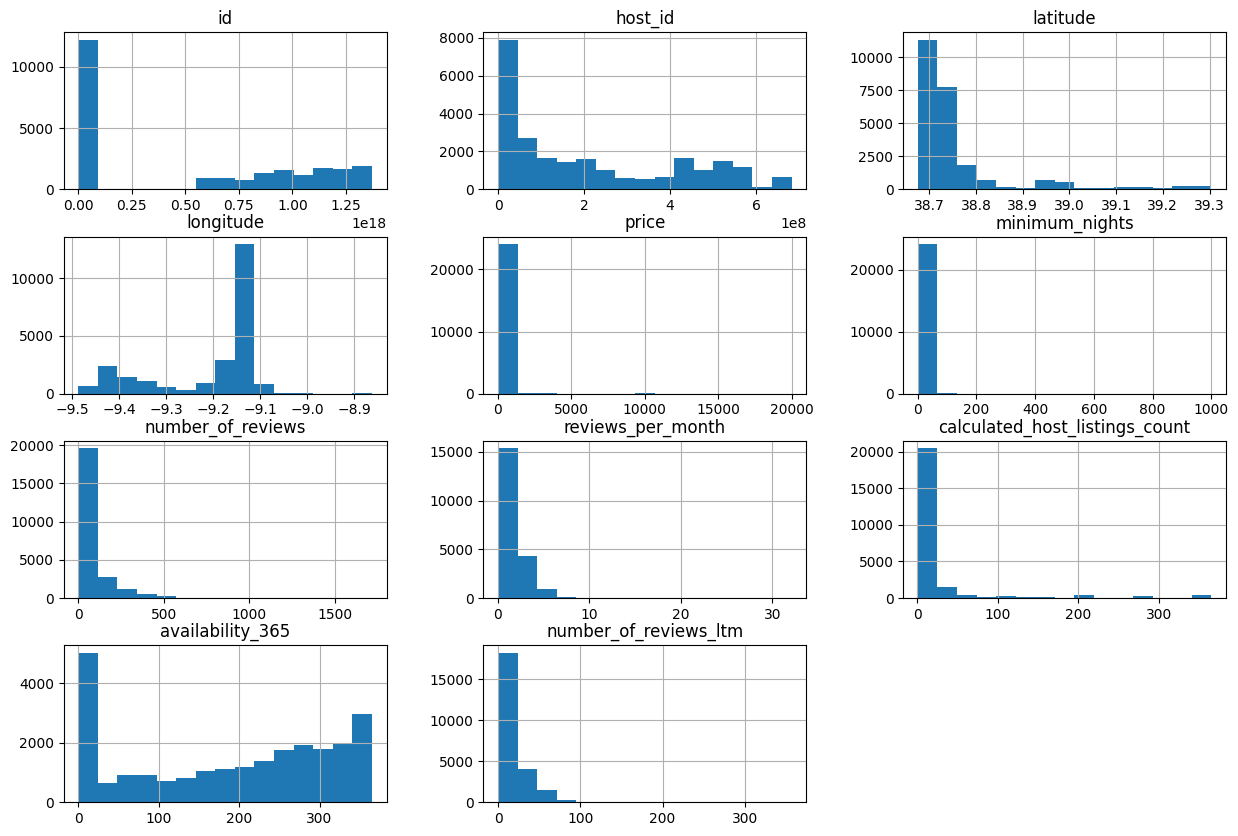

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possivel verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para validar, há duas maneiras simples que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,24245.000000,24245.000000,24245.000000,20693.000000,24245.000000,24245.000000
mean,155.912033,4.775005,66.944071,1.476850,24.080924,187.199753
std,537.932978,16.514956,105.602996,1.479613,61.090379,127.809863
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,64.000000,1.000000,3.000000,0.360000,1.000000,62.000000
50%,95.000000,2.000000,22.000000,1.000000,5.000000,213.000000
75%,142.000000,3.000000,84.000000,2.190000,15.000000,301.000000
max,20000.000000,1000.000000,1718.000000,32.110000,365.000000,365.000000


Observando o resumo estatístico acima, pode-se confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 132, porém seu valor máximo é 20000.
* A quantidade mínimina de noites (`minimum_nights`) está acima de 365 dias no anos.

#### Tratamento de Outliers

<p align="center"><img src = "https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png", width="50%"></p>

**Outliers** são pontos discrepantes, que estão destoando do padrão do conunto de dados.

* Exemplo:
 *Em uma turma, tem pessoas que jogam basquete, que tem 1,90m.

É de extrema importância identificar e tratar esses outliers, pois eles podem nos iludir com os dados.

Podemos identificar um *outlier* de várias maneiras, entre elas podemos citar:

* IQR Score (Interquartile Range)
* Boxplots
* Scatter plots
* Z-Score

#### Limpando *Outliers*

Para efetuar a tratativa, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

**IQR** é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

Vamos analisar os dados e ver o que identificados.

In [ ]:
# verificando a distribuição estatística
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.424500e+04,24245.0,24245.0,24245.0,24245.0,24245.0,24245.0,20693.0,24245.0,24245.0,24245.0
mean,5.077467e+17,210068180.9,38.8,-9.2,155.9,4.8,66.9,1.5,24.1,187.2,14.6
std,5.358326e+17,205508487.8,0.1,0.1,537.9,16.5,105.6,1.5,61.1,127.8,19.3
min,6.499000e+03,14455.0,38.7,-9.5,8.0,1.0,0.0,0.0,1.0,0.0,0.0
25%,2.443591e+07,25083445.0,38.7,-9.3,64.0,1.0,3.0,0.4,1.0,62.0,0.0
50%,5.423976e+07,132853398.0,38.7,-9.1,95.0,2.0,22.0,1.0,5.0,213.0,6.0
75%,1.044899e+18,413319688.0,38.7,-9.1,142.0,3.0,84.0,2.2,15.0,301.0,23.0
max,1.371345e+18,682718779.0,39.3,-8.9,20000.0,1000.0,1718.0,32.1,365.0,365.0,357.0


Aqui, algumas informações despertam a nossa atenção, como por exemplo:

* Lembrando que a variável `price` possui preços diários dos imóveis em moeda local (EUR), é possível visualizar que o Q3 está em 142 euros, mas o máximo está em 20mil euros. Claramente, há *outliers* por aqui.
* A variável `minimum_nights` tem como seu máximo o valor de 1000, sendo que o Q3 está em 3, concluindo a existência de *outliers*
* As variáveis `number_of_reviews`, `calculated_host_listings_count` e `availability_365` também possuem *outliers*, mas não nos interessa nesse tipo de análise.

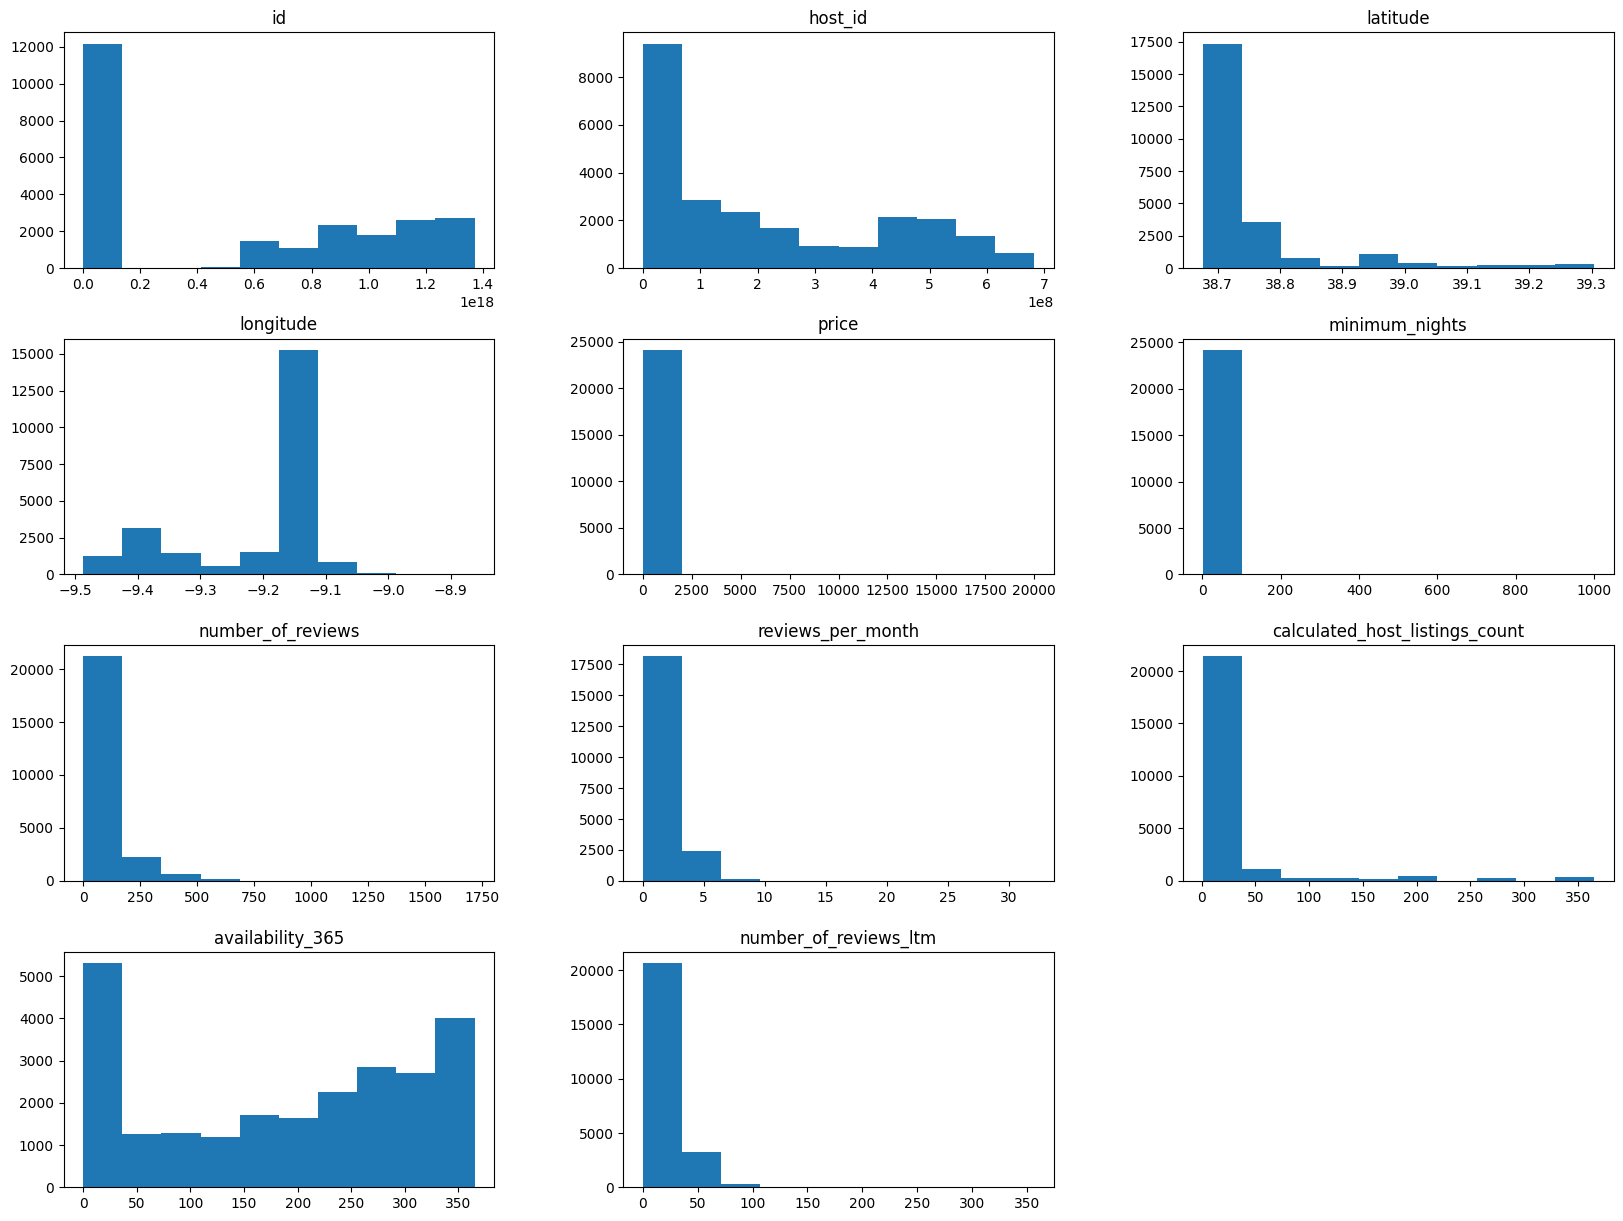

In [ ]:
# verificar novamente as distribuições
df_clean.hist(figsize=(20,15), grid=False);

Verificando os histogramas, conseguimos ver claramente que temos *outliers* presentes. Para tratá-los vamos seguir os seguintes passos:

* **Definir o Q1 e Q3 para as variáveis que serão limpas.**
* **Calcular o IQR para as variáveis.**
* **Definir o limite superior e inferior para cortar os outliers.**
* **Remover os outliers.**

##### Coluna `price`

In [ ]:
# identificando os outliers para a variável price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  78.0
Limite superior de price:  259.0
Limite inferior de price:  -53.0


Vamos plotar o boxplot para verificar os *outliers*

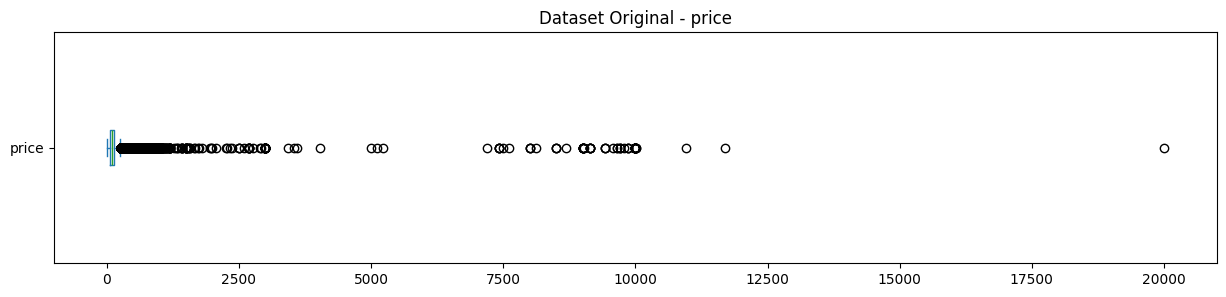

O dataset possui 24245 entradas
1633 entradas acima de 259.0
Representam 6.74% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} entradas".format(df_clean.shape[0]))
print("{} entradas acima de 259.0".format(len(df_clean[df_clean.price > 259.0])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.price > 259.0]) / df_clean.shape[0])*100))

##### Coluna `minimum_nights`

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_clean.minimum_nights.quantile(.25)
q3_minimum_nights = df_clean.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


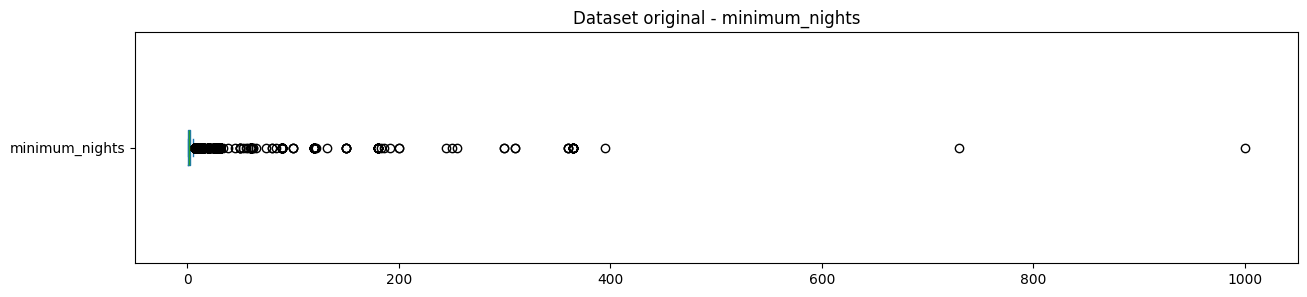

O dataset possui 24245 entradas
2209 entradas acima de 6
Representam 9.11% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset original - minimum_nights')
plt.show()
print("O dataset possui {} entradas".format(df_clean.shape[0]))
print("{} entradas acima de 6".format(len(df_clean[df_clean.minimum_nights > 6.0])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.minimum_nights > 6.0]) / df_clean.shape[0])*100))

##### Limpeza dos *outliers* das colunas tratadas

In [ ]:
# limpando o dataset
df_clean.drop(df_clean[df_clean.price > 259.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6.0].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape depois da limpeza: ', df_clean.shape)

Shape antes da limpeza:  (24264, 18)
Shape depois da limpeza:  (20549, 18)


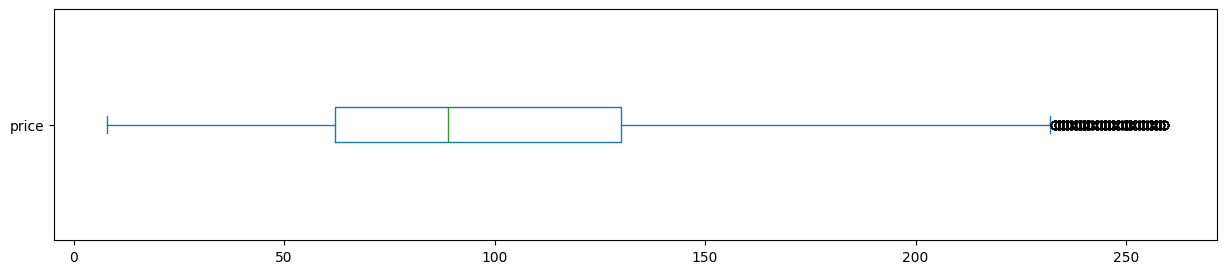

Tamanho original: 24264 linhas
Tamanho atual: 20549 linhas


In [ ]:
# verificando o conjunto price limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
plt.show()
print("Tamanho original: {} linhas".format(df.shape[0]))
print("Tamanho atual: {} linhas".format(df_clean.shape[0]))

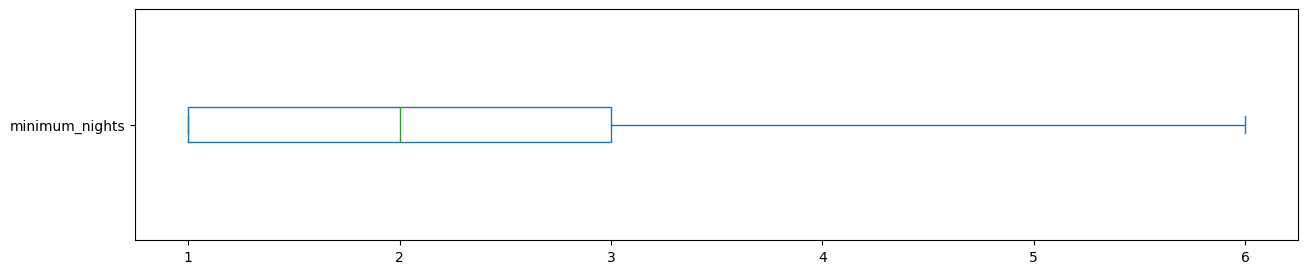

Tamanho original: 24264 linhas
Tamanho atual: 20549 linhas


In [ ]:
# verificando o conjunto minimum_nights limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
plt.show()
print("Tamanho original: {} linhas".format(df.shape[0]))
print("Tamanho atual: {} linhas".format(df_clean.shape[0]))

#### Histogramas sem *outliers*

Agora com o *DataFrame* limpo, vamos ver novamente a distribuição das variáveis numéricas.

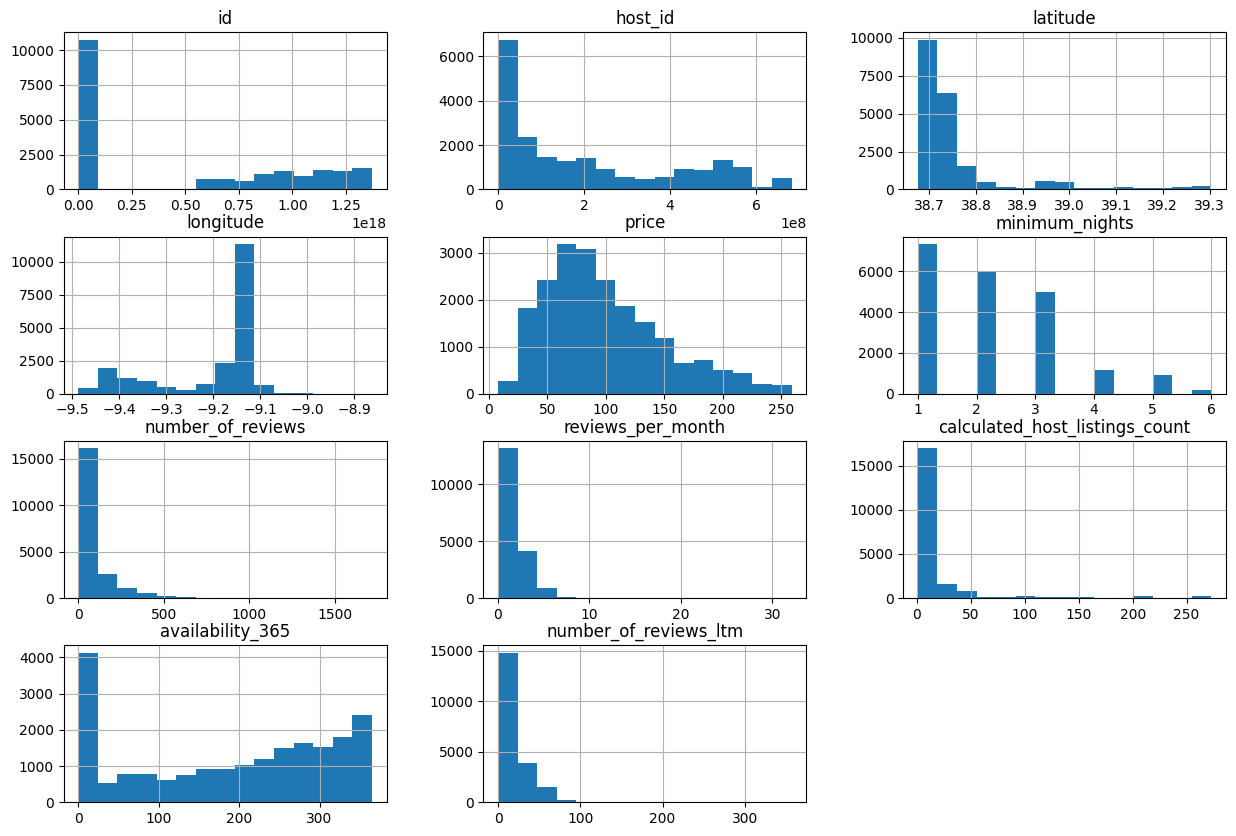

In [ ]:
# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação por ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.111163,-0.040936,-0.136122,-0.039324,-0.088799
minimum_nights,0.111163,1.000000,0.041657,-0.142163,-0.134513,-0.140531
number_of_reviews,-0.040936,0.041657,1.000000,0.630632,-0.101058,0.016435
reviews_per_month,-0.136122,-0.142163,0.630632,1.000000,-0.079531,0.062727
calculated_host_listings_count,-0.039324,-0.134513,-0.101058,-0.079531,1.000000,-0.027580
availability_365,-0.088799,-0.140531,0.016435,0.062727,-0.027580,1.000000


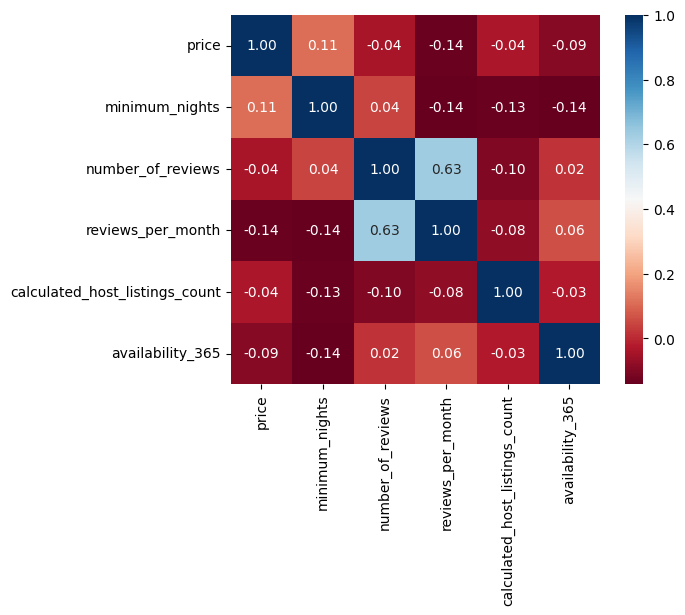

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usand o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

,count
room_type,
Entire home/apt,14936
Private room,5331
Hotel room,174
Shared room,108


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

,count
room_type,
Entire home/apt,0.615562
Private room,0.219708
Hotel room,0.007171
Shared room,0.004451


### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
# ver a média dos preços de cada freguesia
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Dois Portos e Runa,175.609375
Olhalvo,170.000000
Aldeia Galega da Merceana e Aldeia Gavinha,162.222222
Carvoeira e Carmes,157.500000
Vermelha,152.500000
Santa Brbara,148.771044
Reguengo Grande,147.410714
Peral,142.400000
Azambuja,135.800000


Acima, é possível ver uma lista dos bairros mais caros, mas caso você conheça um pouco sobre Lisboa, percebeu que a maioria são vilas de municípios vizinhos, fortes em turismo de surf e beleza natural, mas o nosso intuito é analisar apenas as freguesias de Lisboa.

O código seguinte é um filtro de apenas as freguesias situadas em Lisboa.

In [ ]:
# bairros (freguesias) de Lisboa
freguesias_de_lisboa = [
    'Ajuda', 'Alcântara', 'Alvalade', 'Areeiro', 'Arroios', 'Avenidas Novas',
    'Beato', 'Belém', 'Benfica', 'Campo de Ourique', 'Campolide', 'Carnide',
    'Estrela', 'Lumiar', 'Marvila', 'Misericórdia', 'Olivais', 'Parque das Nações',
    'Penha de França', 'Santa Clara', 'Santa Maria Maior', 'Santo António',
    'São Domingos de Benfica', 'São Vicente'
]

# criar um novo dataframe apenas com as informações de Lisboa
df_lisboa = df_clean[df_clean['neighbourhood'].isin(freguesias_de_lisboa)].copy()

# aqui está as freguesias mais caras de Lisboa
df_lisboa.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Santa Maria Maior,111.879214
Estrela,98.332171
Arroios,90.815272
Marvila,89.273577
Campo de Ourique,82.146853
Campolide,81.205160
Alvalade,80.783180
Benfica,80.462529
Avenidas Novas,78.543451


Por isso da importância de conhecer os dados e ir afundo do porque que o nosso código da esse resultado. O código bem feito traz o que a gente quer, mas as vezes não o que a gente precisa.

Como podemos ver, o preço médio dos imóveis das freguesias cituadas em Lisboa é 2x menor do que a primeira média feita.

Outro ponto importante é o porque de Estrela ser o primeiro e o porque de Alvalade ser da posição. Por que eu falo isso?

As vezes a média de uma freguesia é maior que a outra, mas não mais caro, por ter menos imóveis alugáveis, ou até mesmo *outliers* presentes. Vamos ver um exemplo:

In [ ]:
# ver quantidade de imóveis em Estrela
print(df_lisboa[df_lisboa.neighbourhood == "Santa Maria Maior"].shape)

# ver as entradas de Cardosas
df_lisboa[df_lisboa.neighbourhood == "Estrela"]

(3059, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
8,50108,Duplex do Pipas,229376,Pipas,Lisboa,Estrela,38.703880,-9.165460,Entire home/apt,108.0,2,30,2019-11-05,0.19,2,69,0,licenca ausente
44,379156,Apartment in Historic Building,1039097,Try,Lisboa,Estrela,38.704980,-9.171560,Entire home/apt,73.0,3,27,2024-08-31,0.18,11,204,2,44076-AL
94,119120,Lapa 2Bdr with City and River Views,387186,Nuno,Lisboa,Estrela,38.709270,-9.161220,Entire home/apt,112.0,3,382,2025-02-27,2.31,4,0,35,6820/AL
220,792168,Charming Apartment near Basilica Estrela,4190120,Helena,Lisboa,Estrela,38.714973,-9.162873,Entire home/apt,124.0,2,48,2024-08-04,0.32,1,252,12,licenca ausente
230,821922,Spacious Fully Equiped Apartment,1039097,Try,Lisboa,Estrela,38.705850,-9.169980,Entire home/apt,104.0,3,13,2024-03-24,0.10,11,2,1,44072-AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24133,1363802667776160081,Cozy Room for singles or couples,437989245,Ignacio,Lisboa,Estrela,38.705520,-9.169170,Private room,39.0,1,0,nao avaliado,NaN,1,188,0,Exempt
24157,1364705583518821741,FLH Campo Ourique Apartment with View,3953109,Feels Like Home,Lisboa,Estrela,38.714950,-9.163143,Entire home/apt,165.0,1,0,nao avaliado,NaN,273,331,0,14829
24171,1365192005551887137,"Cozy 1BR, Private Terrace & Pool – Estrela",558684228,Corentin,Lisboa,Estrela,38.713334,-9.158631,Entire home/apt,196.0,1,0,nao avaliado,NaN,14,297,0,Exempt
24194,1366009687911640129,The Quarter Nook,32670165,João Miguel,Lisboa,Estrela,38.707336,-9.162100,Entire home/apt,74.0,1,3,2025-03-05,3.00,1,351,3,Exempt


Pode ser visto uma enorme diferença de vendas em cada uma das situações, uma vendeu mais do que a outra, mas isso realmente quer dizer que a freguesia **Santa Maria Maior** é realmente mais cara que **Estrela**? Como pode ser visto nos dados seguintes, Estrela acaba sendo mais cara 7.028 € por m², enquanto a Santia Maria Maior com 6.175 € por m², pesquisa feita pelo relatório apresentado pela [Idealista](https://www.idealista.pt/media/relatorios-preco-habitacao/venda/lisboa/lisboa/estrela).

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

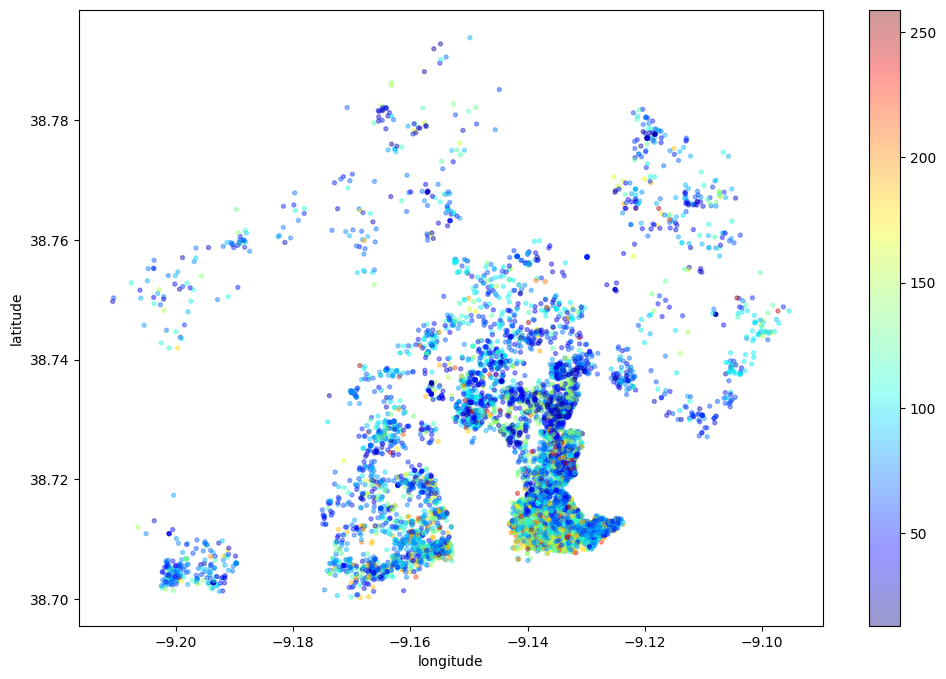

In [ ]:
# plotar os imóveis pela latitude-longitude
df_lisboa.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_lisboa['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Mudando um pouco do sentido caso fosse exibido com o `df` (df que continha todas as freguesias)

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_lisboa.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:10]

,minimum_nights
neighbourhood,
Lumiar,2.552381
Benfica,2.369565
Carnide,2.361111
Campo de Ourique,2.276224
Areeiro,2.241042
Avenidas Novas,2.234249
Ajuda,2.199029
Alvalade,2.186441
Campolide,2.171171


Observe o topo da lista: **Lumiar**, **Benfica**, **Carnide**, **Alvalade**, **Avenidas Novas**, **Areeiro**. Com exceção de Campo de Ourique, todos os bairros do topo formam um grande arco na zona centro-norte de Lisboa.

O que isso significa? Esta não é a Lisboa turística. É uma Lsiboa funcional, ou seja, os anfitriões nestas áreas não buscam a competição pelo turista de 3 dias. O seu público alvo é pessoas que necessitam de estadias desemanas ou meses. Sendo eles:

* Estudantes ou professores (**polos educacionais**).
* Profissionais Deslocados (**concentração de escritórios**).
* Famílias de Pacientes (**proximidade de hospitais**).

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já foi notado que existem *outliers* em algumas variáveis.

Também foi visto que em algumas localidades há poucos imóveis disponíveis, podendo distorcer as informações estatísticas de alguns atributos, provando ser necessári um conhecimento a mais e a indagação de que se aquilo que é mostrado é real.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial.